In [1]:
from statannot import add_stat_annotation
from matplotlib import pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc

In [3]:
sc.set_figure_params(dpi=150)

In [4]:
adata = sc.read("/home/lugli/spuccio/Projects/SP039/GBmap/Tcell_ac.h5ad")

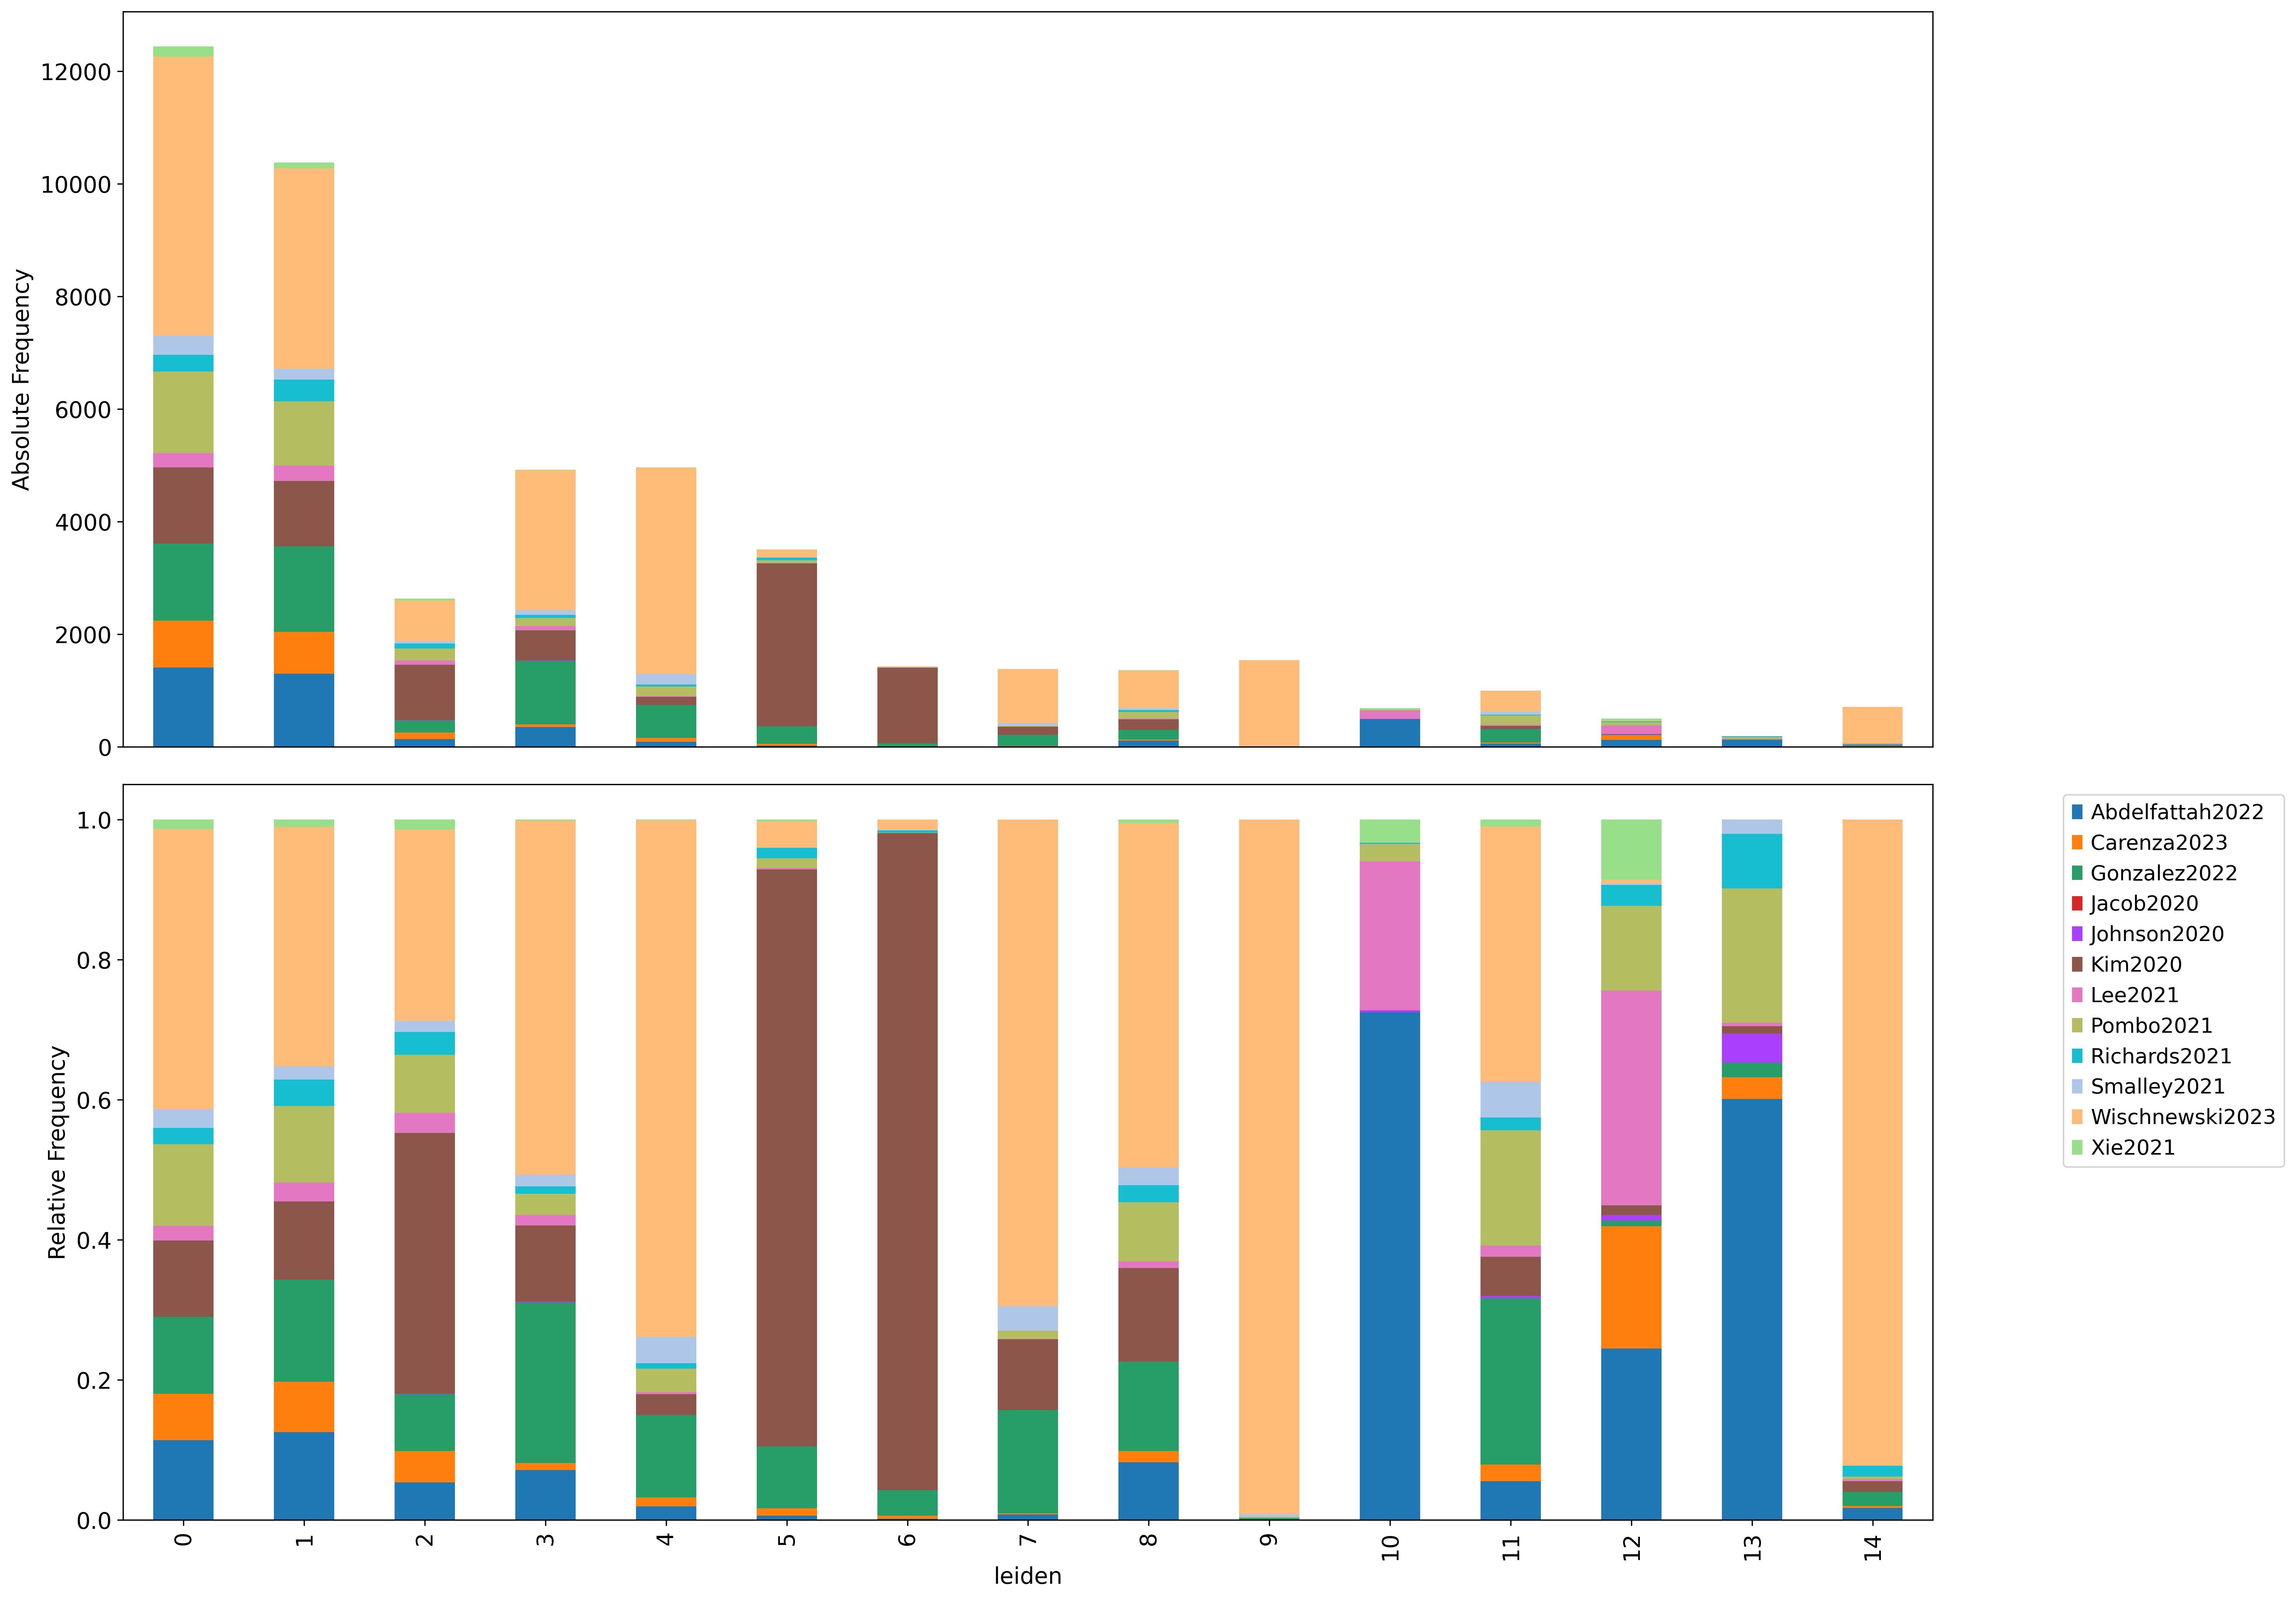

In [5]:
fig, (ax2, ax1) = plt.subplots(2, 1,figsize=(20, 14))
ax1 = adata.obs.groupby("leiden")["author"].value_counts(normalize=True).unstack().plot.bar(stacked=True,legend=False,ax=ax1)
ax2.set_xlabel(" ")
ax2.get_xaxis().set_visible(False)
ax1.set_ylabel("Relative Frequency")
ax1.grid(False)
ax1.legend(bbox_to_anchor=(1.2, 1.0))
ax2 = adata.obs.groupby("leiden")["author"].value_counts(normalize=False).unstack().plot.bar(stacked=True,legend=False,ax=ax2)
ax2.set_xlabel("Cluster")
ax2.set_ylabel("Absolute Frequency")
ax2.grid(False)
fig.tight_layout()

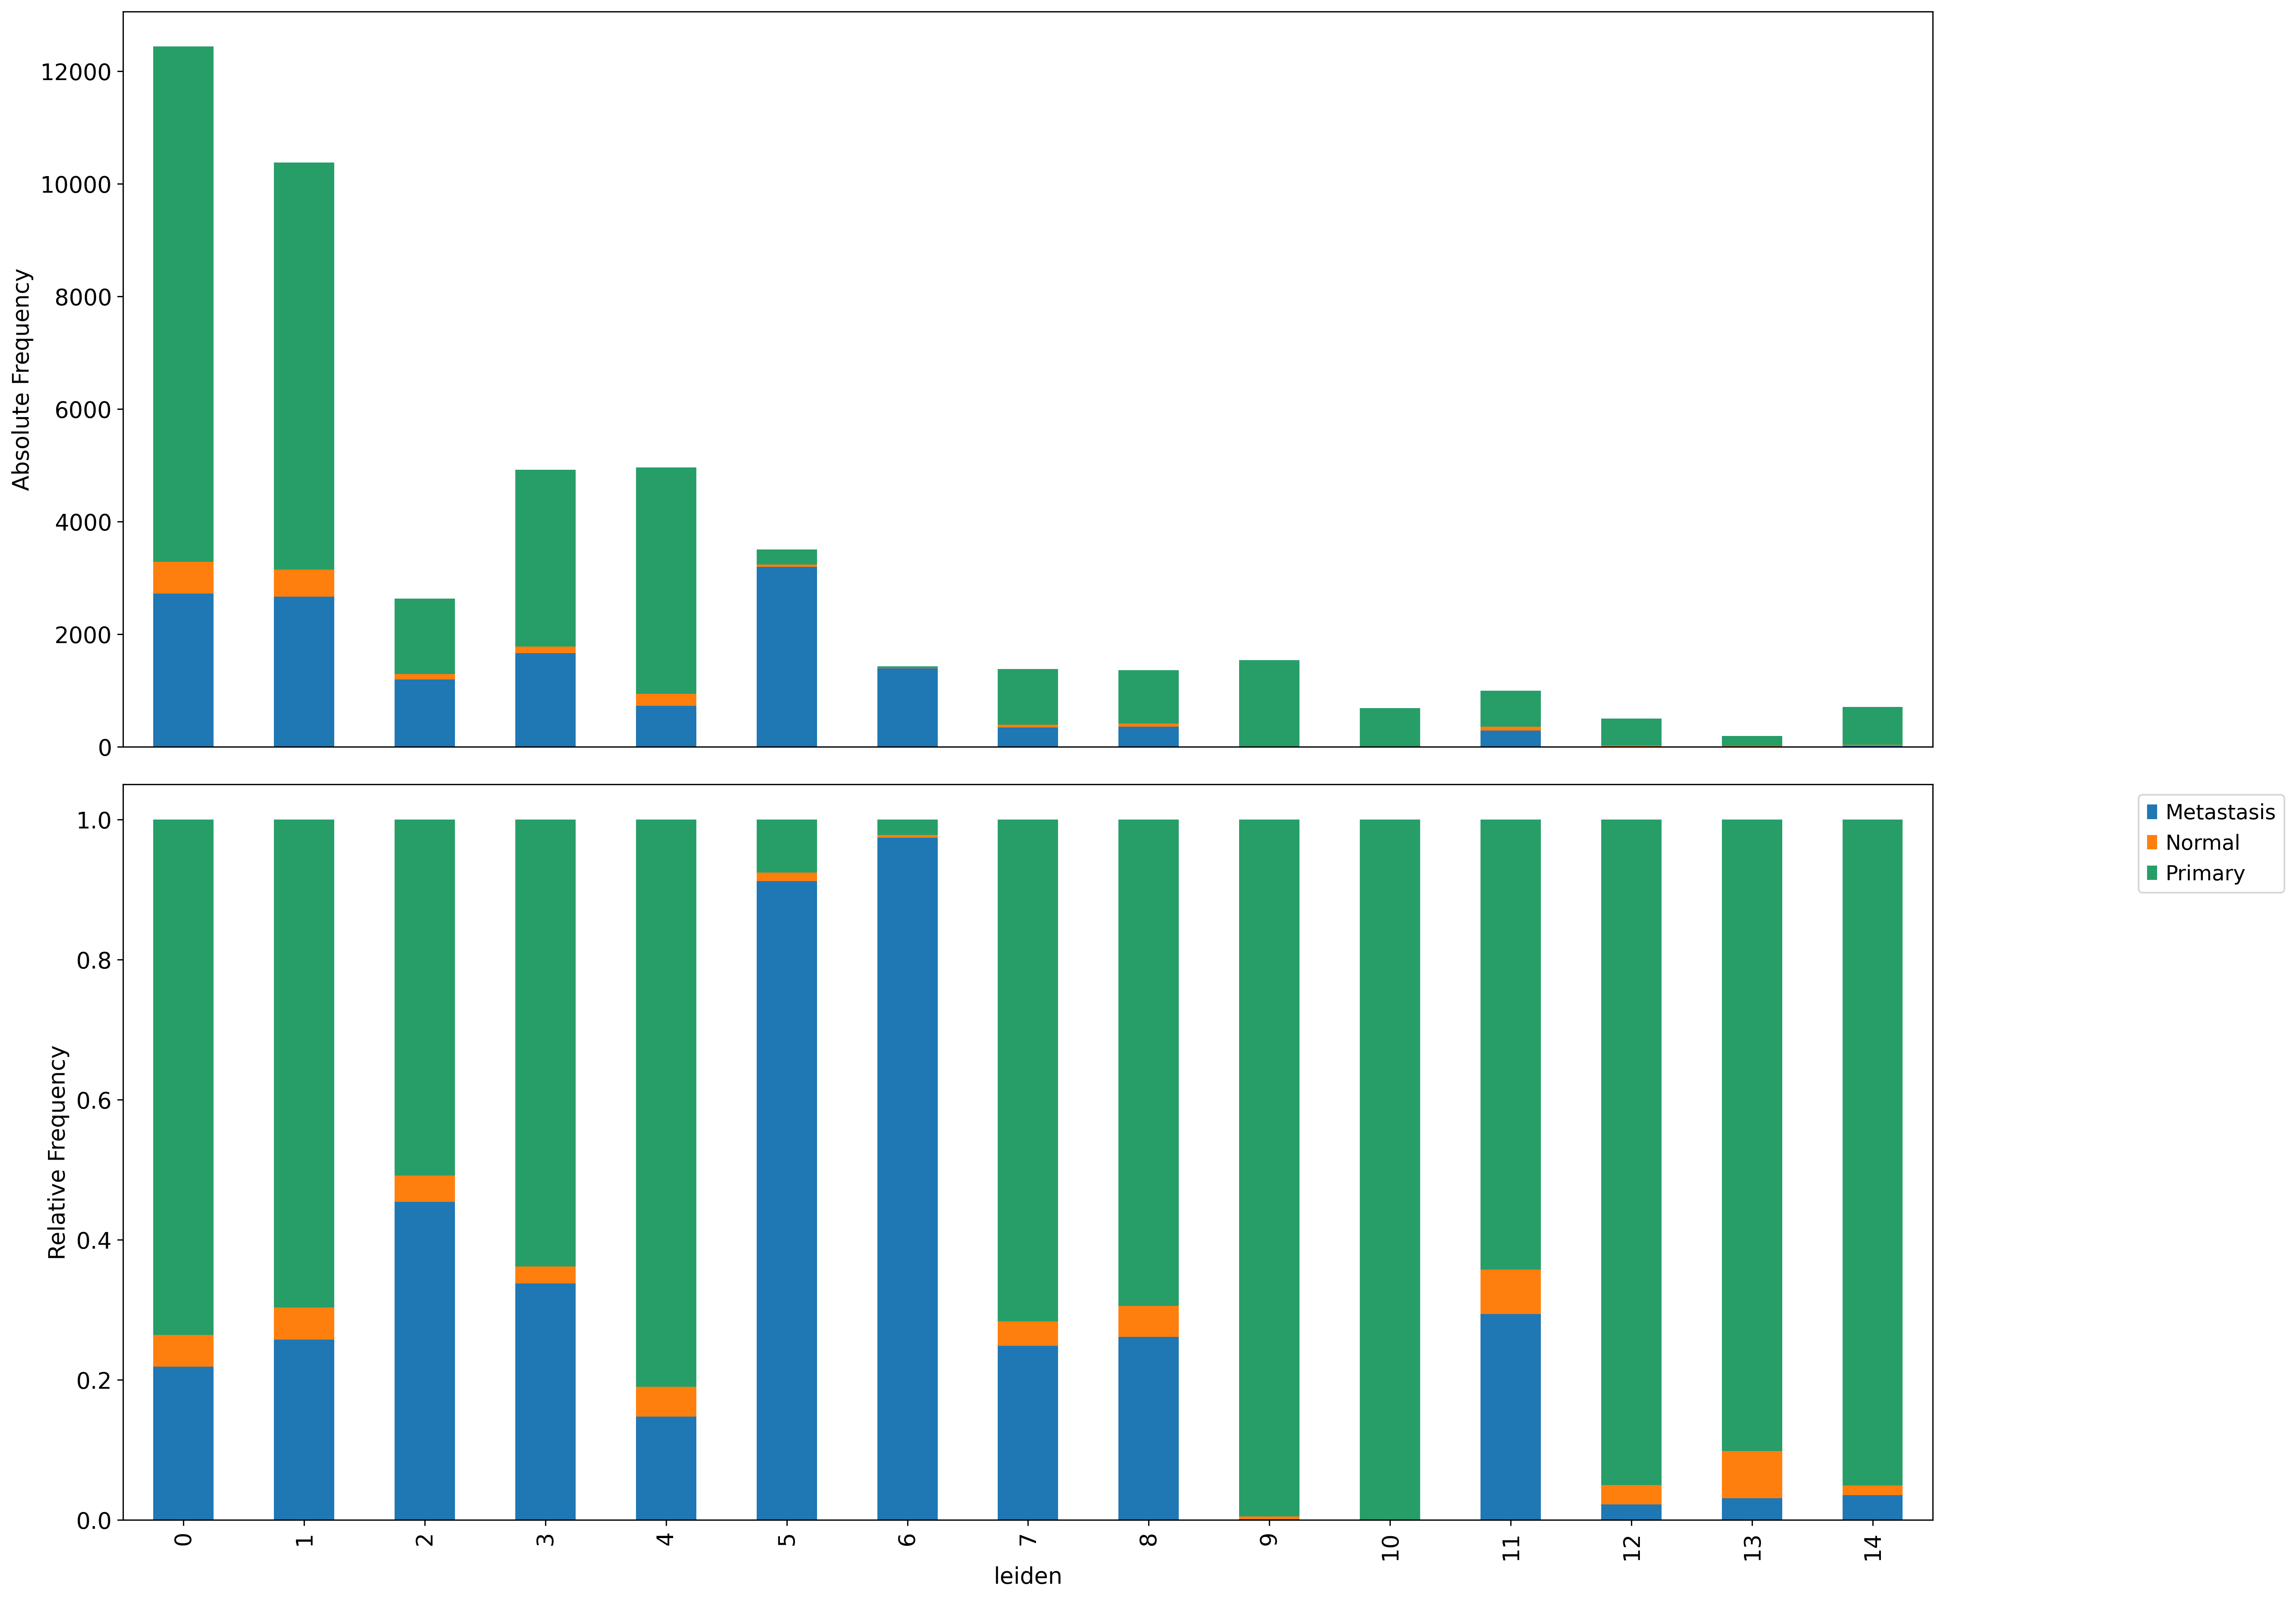

In [6]:
fig, (ax2, ax1) = plt.subplots(2, 1,figsize=(20, 14))
ax1 = adata.obs.groupby("leiden")["stage"].value_counts(normalize=True).unstack().plot.bar(stacked=True,legend=False,ax=ax1)
ax2.set_xlabel(" ")
ax2.get_xaxis().set_visible(False)
ax1.set_ylabel("Relative Frequency")
ax1.grid(False)
ax1.legend(bbox_to_anchor=(1.2, 1.0))
ax2 = adata.obs.groupby("leiden")["stage"].value_counts(normalize=False).unstack().plot.bar(stacked=True,legend=False,ax=ax2)
ax2.set_xlabel("Cluster")
ax2.set_ylabel("Absolute Frequency")
ax2.grid(False)
fig.tight_layout()

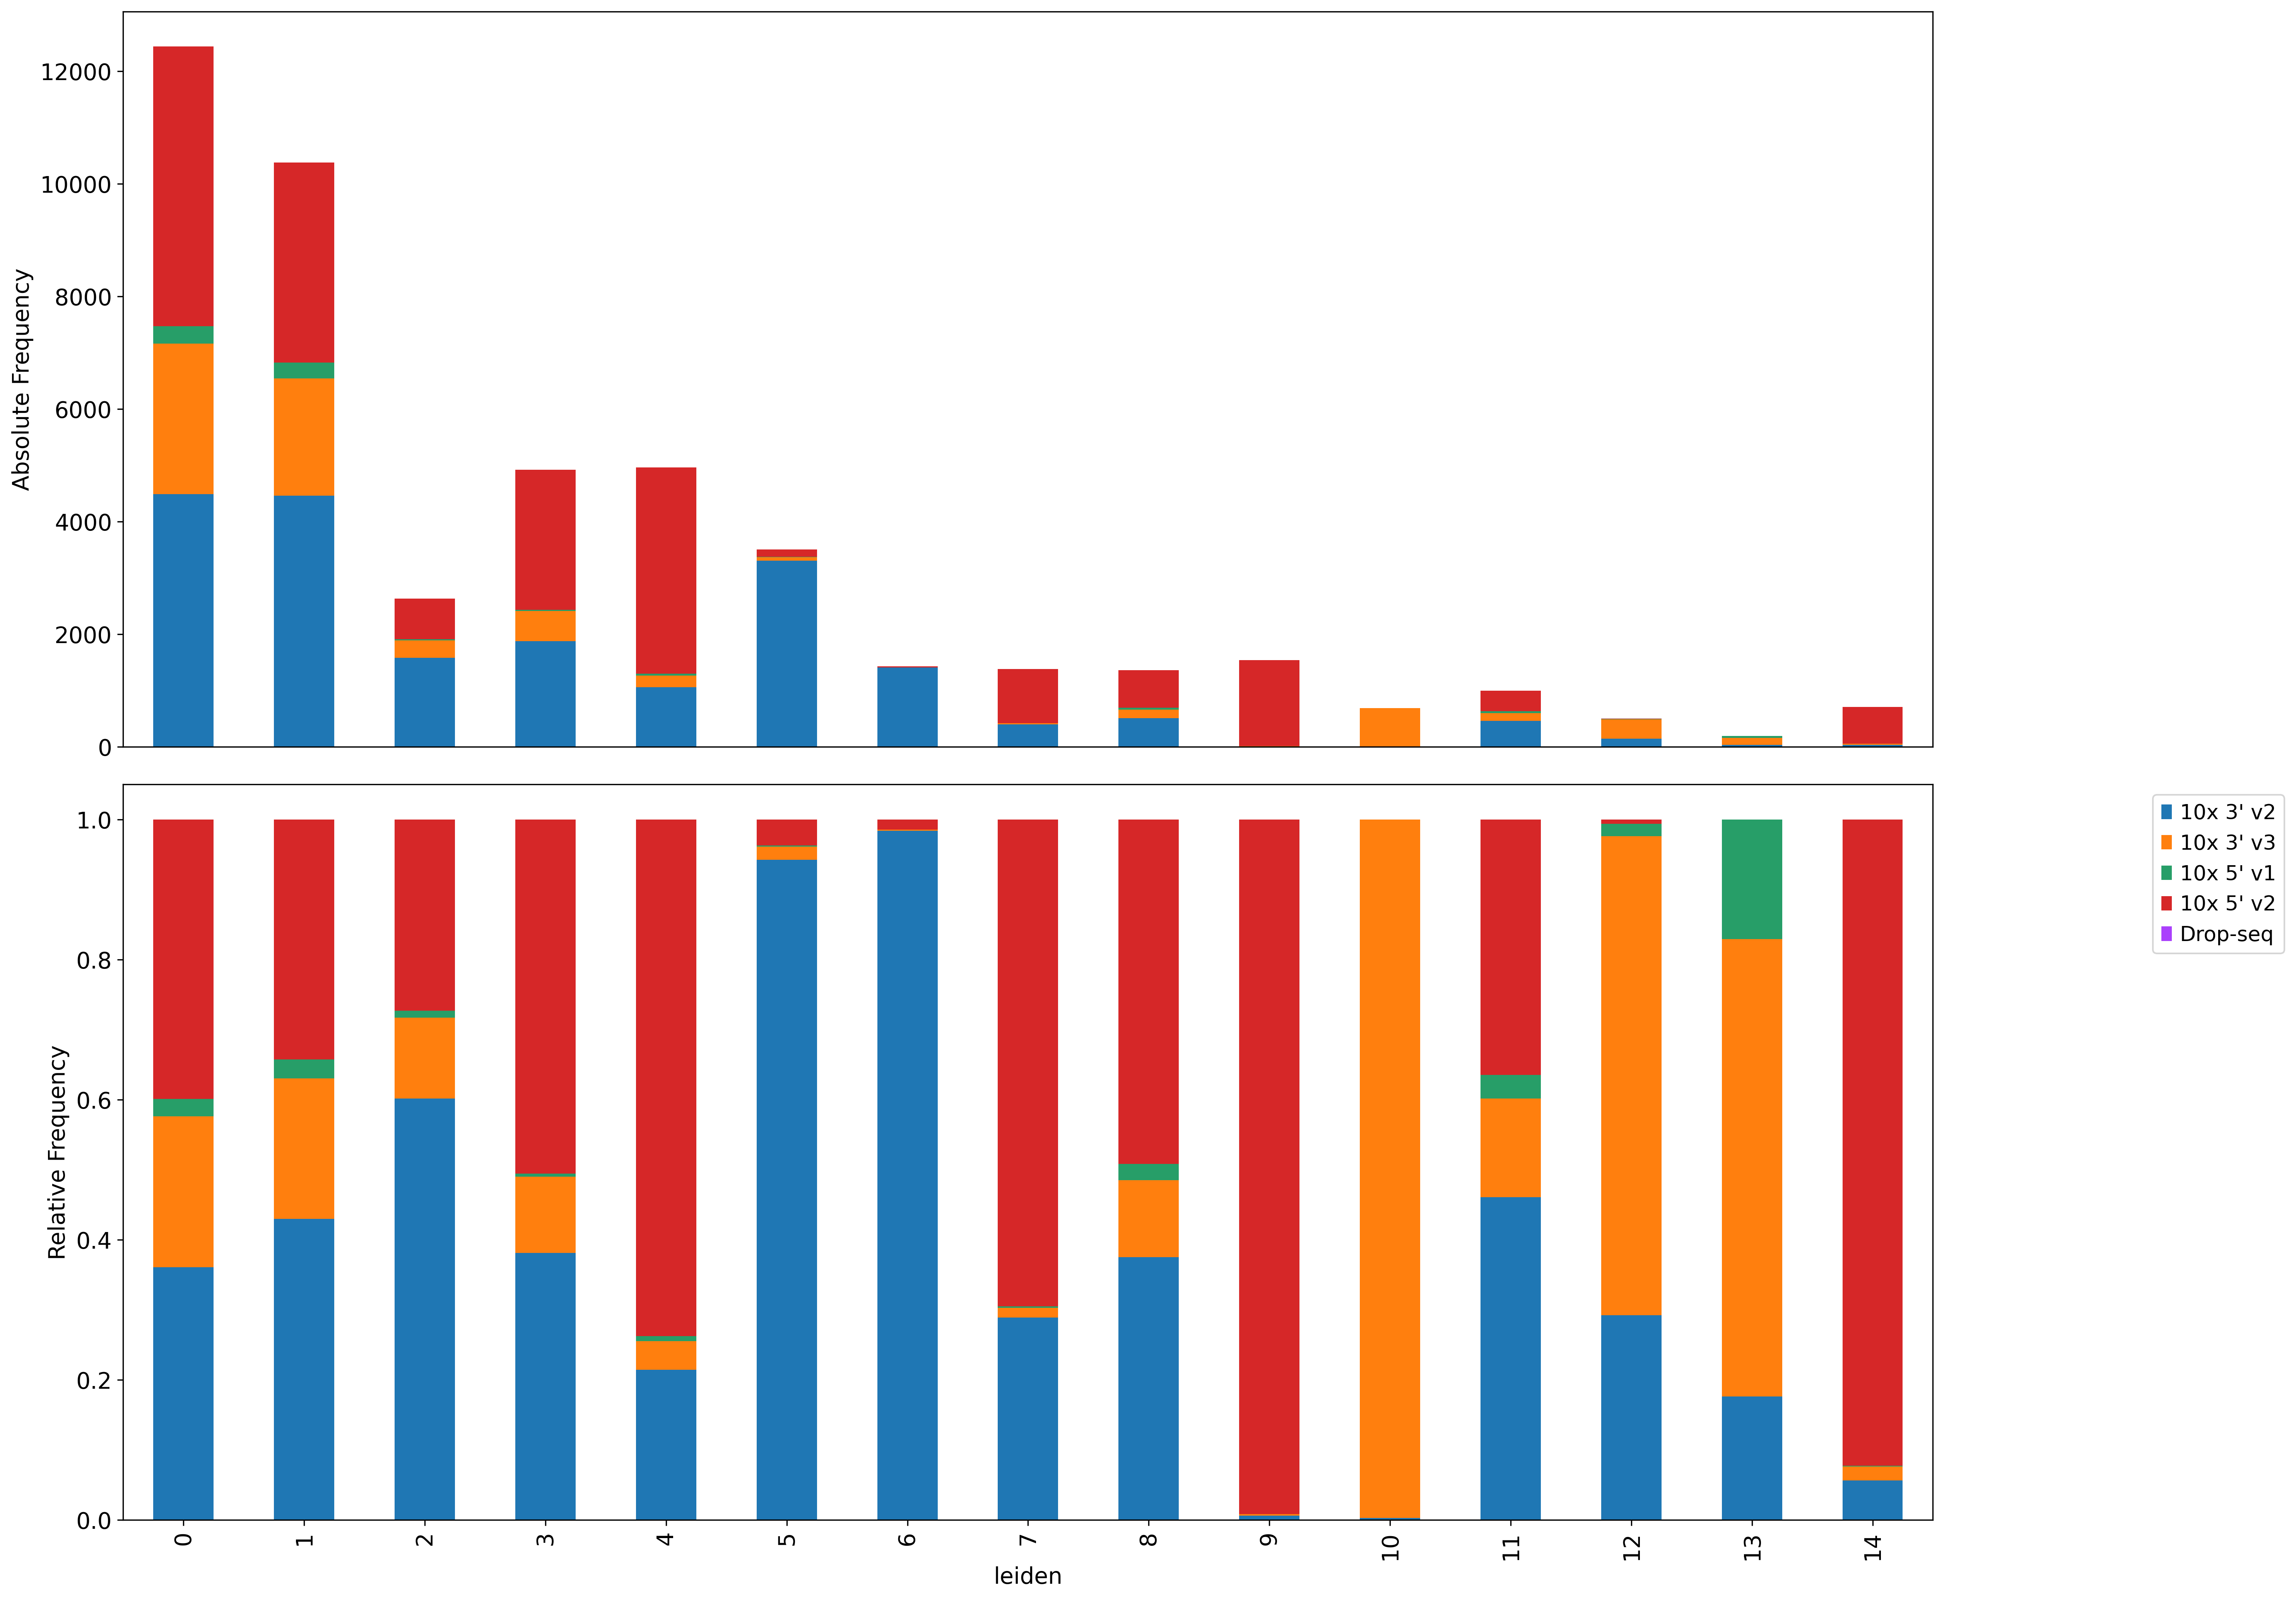

In [7]:
fig, (ax2, ax1) = plt.subplots(2, 1,figsize=(20, 14))
ax1 = adata.obs.groupby("leiden")["assay"].value_counts(normalize=True).unstack().plot.bar(stacked=True,legend=False,ax=ax1)
ax2.set_xlabel(" ")
ax2.get_xaxis().set_visible(False)
ax1.set_ylabel("Relative Frequency")
ax1.grid(False)
ax1.legend(bbox_to_anchor=(1.2, 1.0))
ax2 = adata.obs.groupby("leiden")["assay"].value_counts(normalize=False).unstack().plot.bar(stacked=True,legend=False,ax=ax2)
ax2.set_xlabel("Cluster")
ax2.set_ylabel("Absolute Frequency")
ax2.grid(False)
fig.tight_layout()

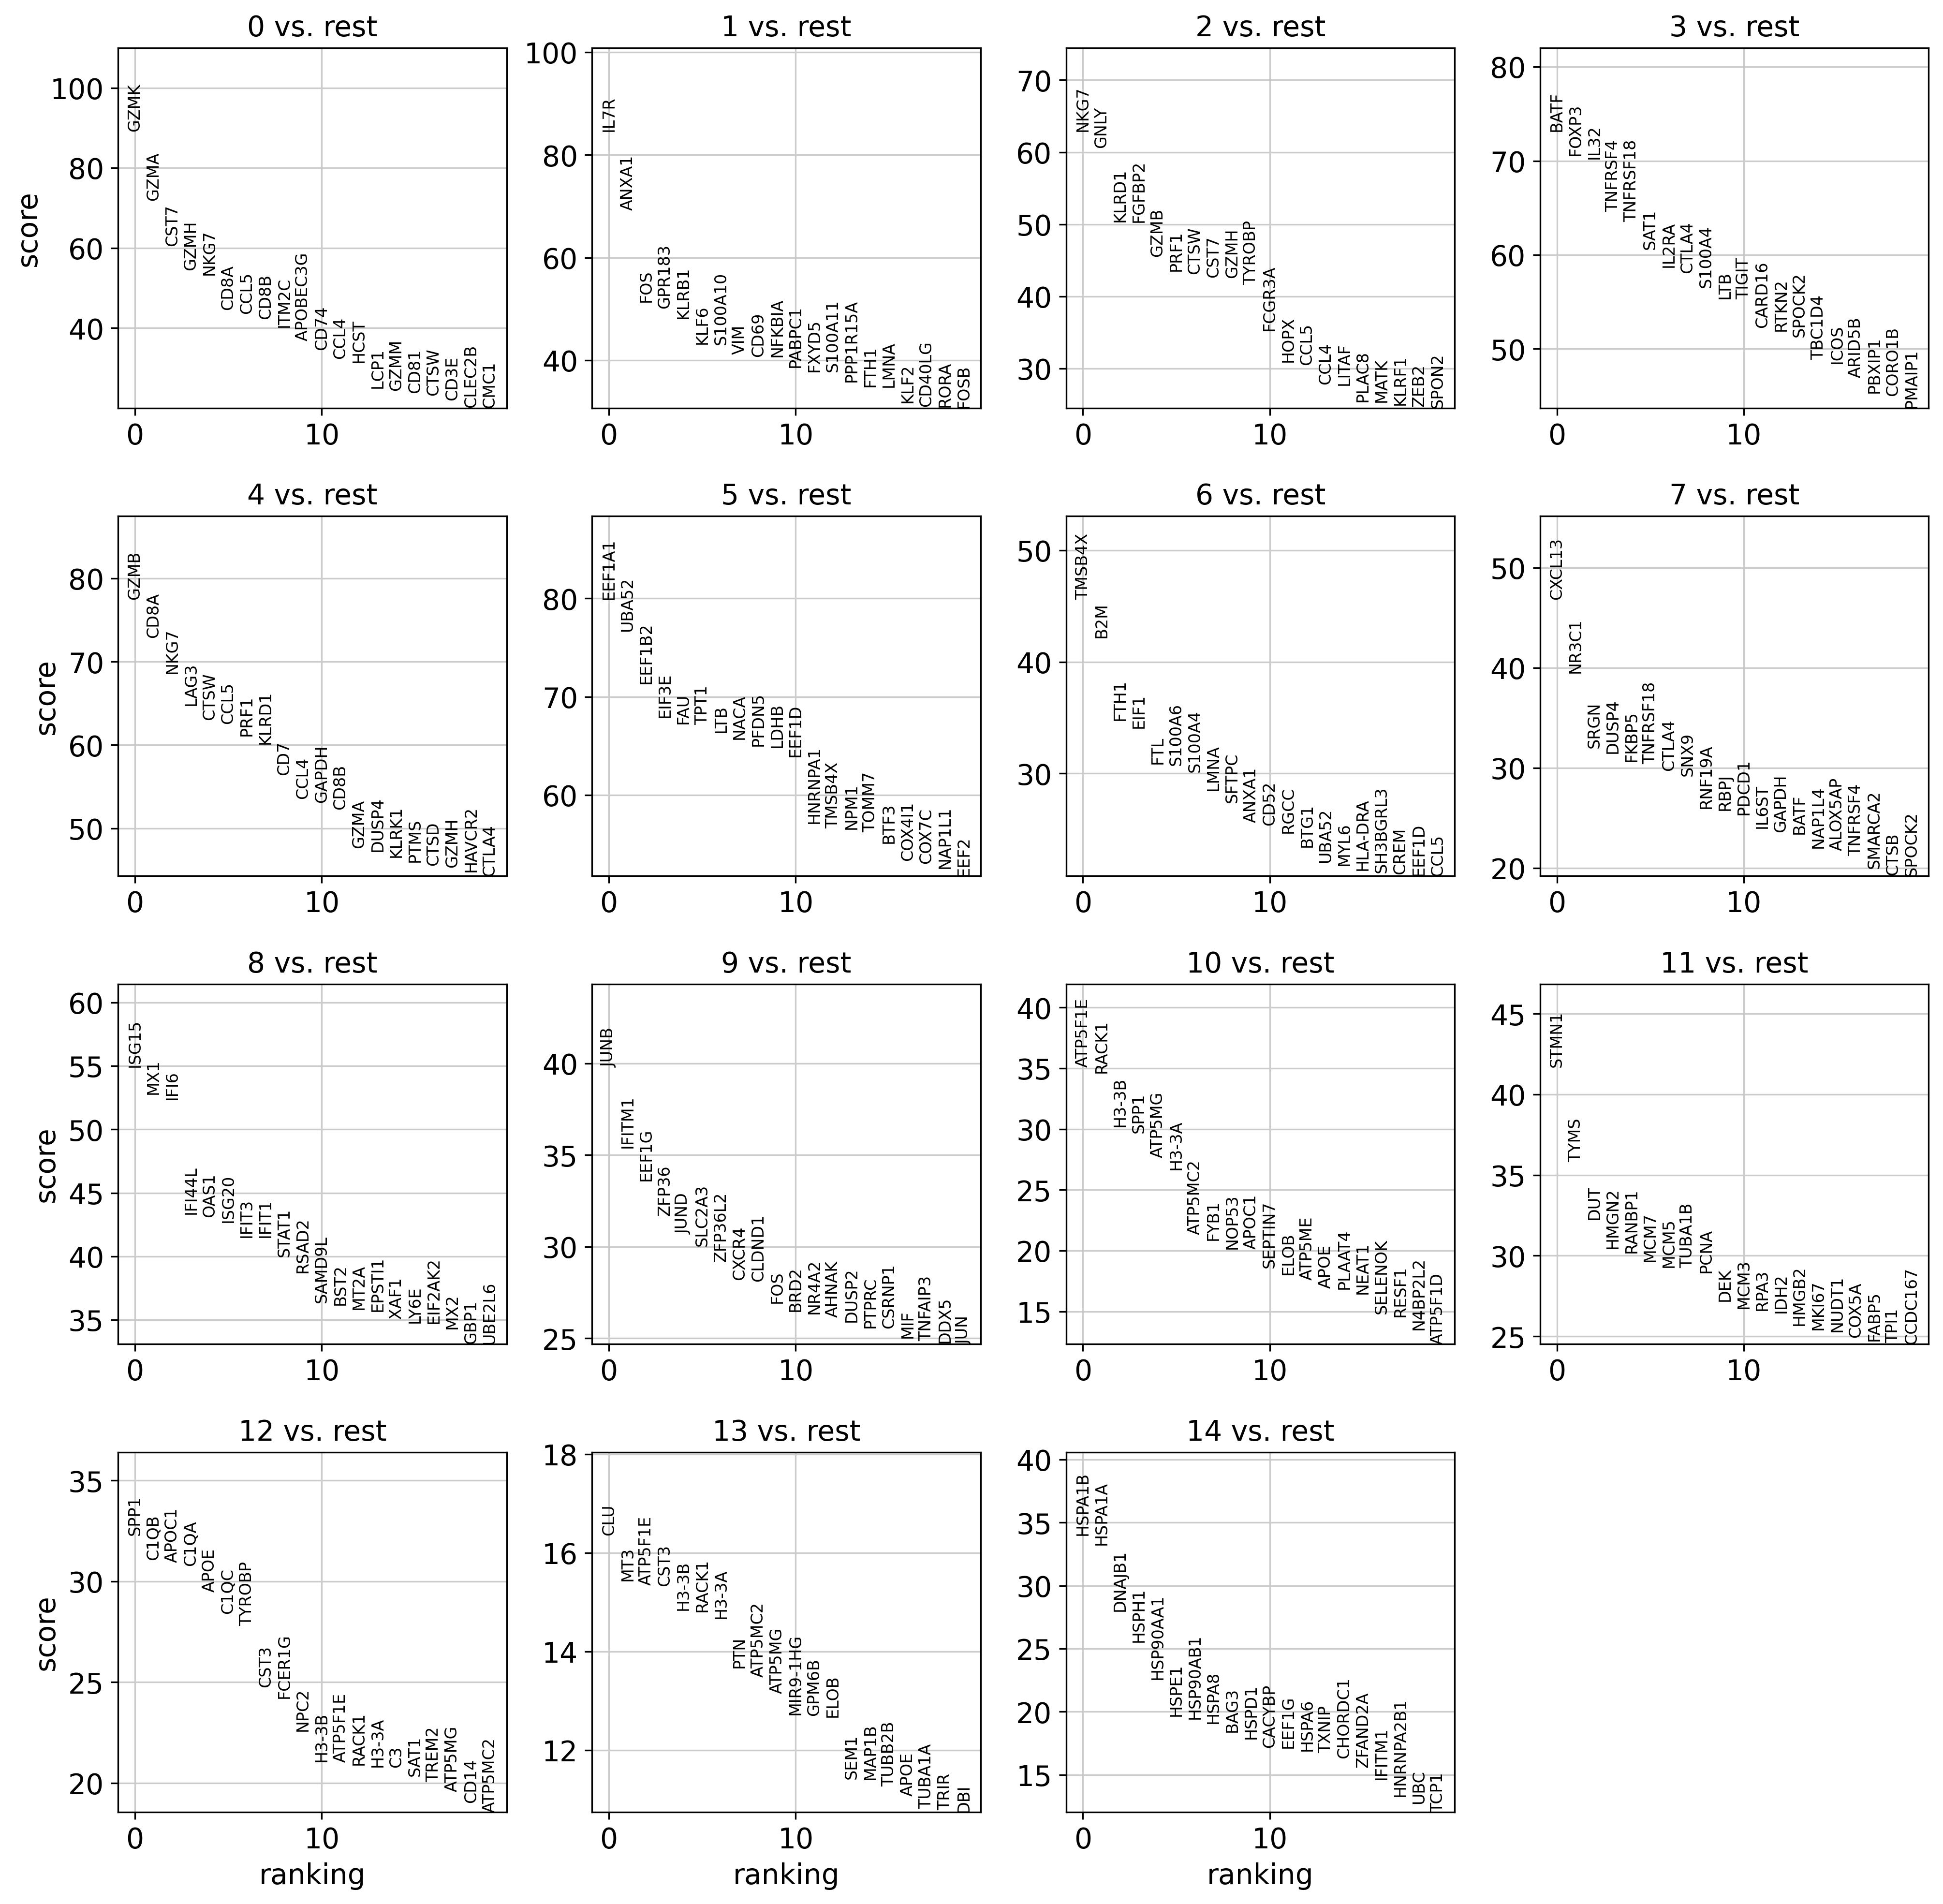

In [8]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon',pts=0.20)
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

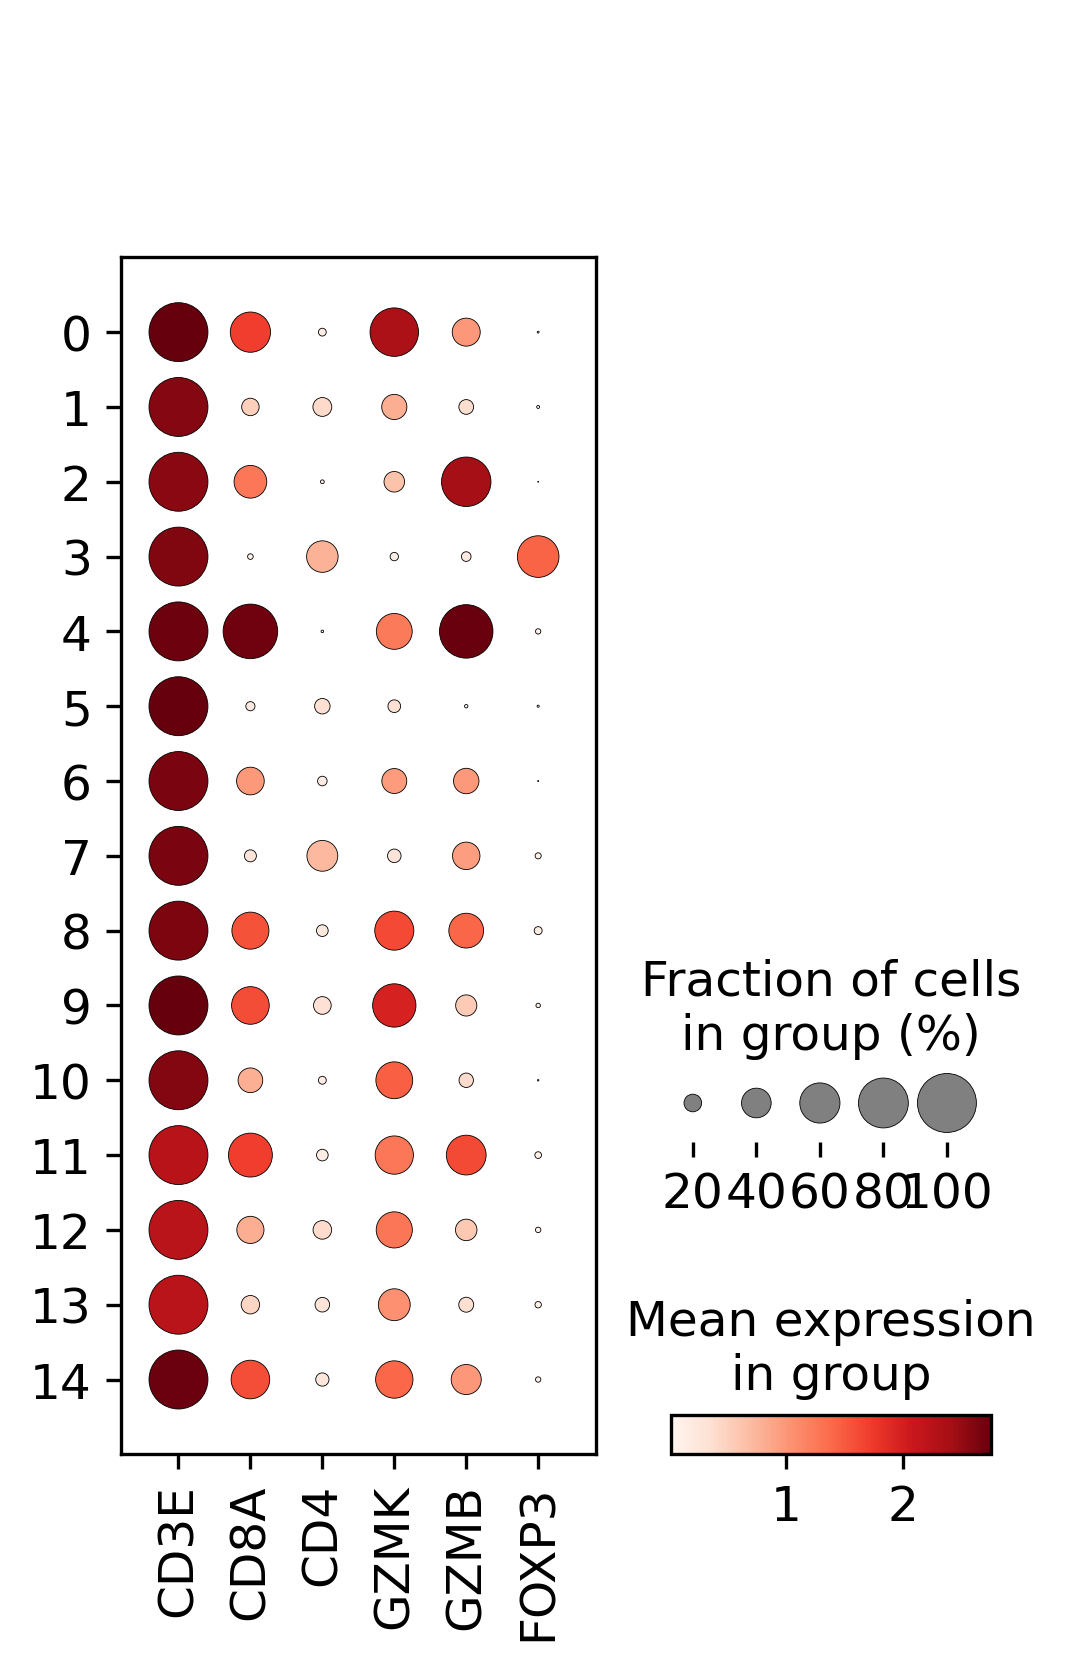

In [9]:
sc.pl.dotplot(adata, ['CD3E','CD8A','CD4','GZMK','GZMB','FOXP3'], groupby='leiden')

In [10]:
CD8 = adata[adata.obs['leiden'].isin(['0','4','6','8','9','10','11','12','14']),:]

In [11]:
Tcell = sc.read("/home/lugli/spuccio/Projects/SP039/GBmap/Concatenato609508K.h5ad")

In [16]:
Tcell.X = Tcell.layers['raw']

In [17]:
CD8 = Tcell[Tcell.obs.index.isin(CD8.obs.index),:]

In [22]:
CD8.write("/home/lugli/spuccio/Projects/SP039/GBmap/CD8_filtate.h5ad")